Author: Lijing Wang, lijing52@stanford.edu; David Yin, yinzhen@stanford.edu; Jef Caers, jcaers@stanford.edu (2021)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
warnings.filterwarnings("ignore")

## Two Datasets

Dataset1: n = 200

Dataset2: n = 50

In [2]:
np.random.seed(10)
dataset1 = np.random.multivariate_normal(np.array([2,1]), np.array([[1, 1.5], [1.5, 3]]), 200)
dataset2 = dataset1[:50,:] + np.random.multivariate_normal(np.array([0,0]), np.array([[0.1, 0], [0, 0.1]]), 50)
dataset1 = pd.DataFrame(dataset1,columns = ['X','Y'])
dataset2 = pd.DataFrame(dataset2,columns = ['X','Y'])

(-5.0, 6.0)

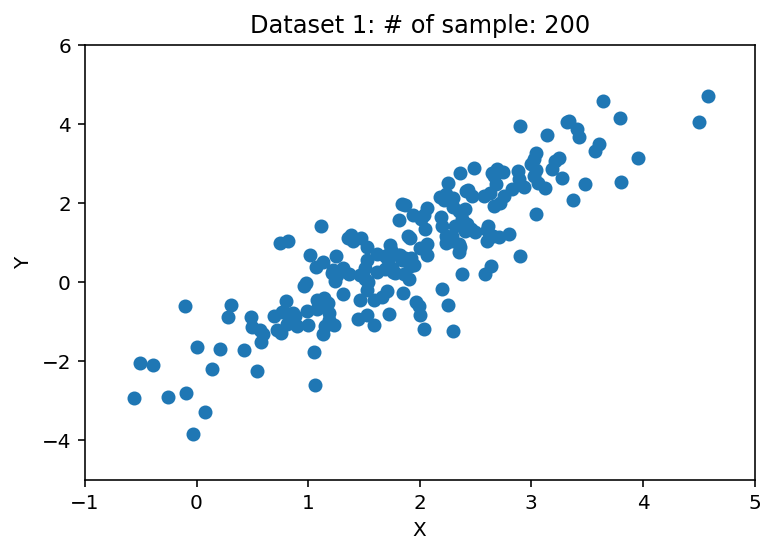

In [3]:
plt.scatter(dataset1['X'],dataset1['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset 1: # of sample: 200')
plt.xlim(-1,5)
plt.ylim(-5,6)

(-5.0, 6.0)

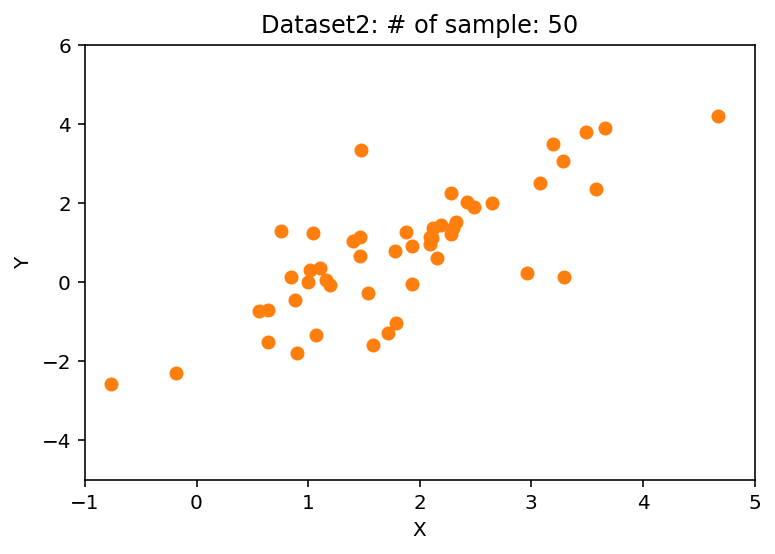

In [ ]:
plt.scatter(dataset2['X'],dataset2['Y'],c = 'C1')  
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset2: # of sample: 50')
plt.xlim(-1,5)
plt.ylim(-5,6)

## Fit linear regression

In [ ]:
import statsmodels.formula.api as smf
linear_reg_dataset1 = smf.ols(formula='Y ~ X', data=dataset1)
linear_reg_dataset1 = linear_reg_dataset1.fit()
linear_reg_dataset2 = smf.ols(formula='Y ~ X', data=dataset2)
linear_reg_dataset2 = linear_reg_dataset2.fit()

Linear regression: fit dataset 1

Text(0, 0.5, 'Y')

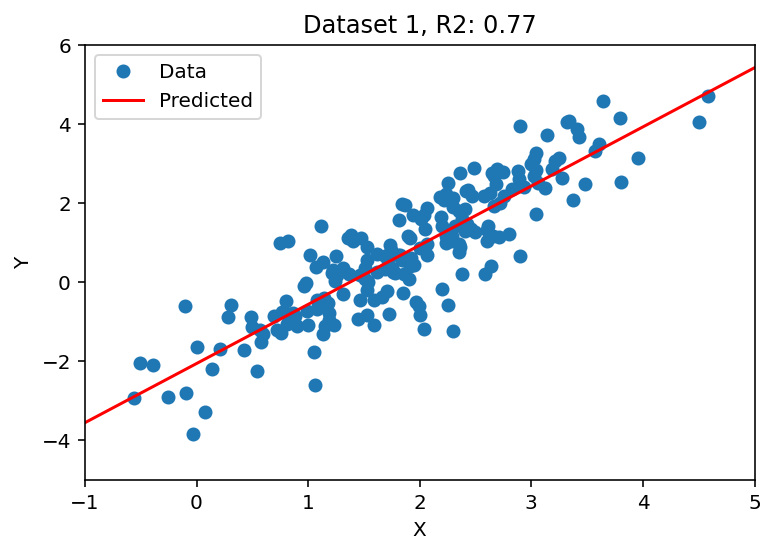

In [ ]:
X_pred = np.linspace(-2,6,num = 100)
reg = linear_reg_dataset1
data = dataset1

plt.plot(data['X'], data['Y'], 'o', label="Data")
plt.plot(X_pred,reg.predict(exog=dict(X=X_pred)), 'r-', label="Predicted")
plt.title('Dataset 1, '+'R2: '+str(np.round(reg.rsquared,2)))
plt.legend(loc="best")
plt.xlim(-1,5)
plt.ylim(-5,6)
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
print(linear_reg_dataset1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     647.7
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           2.42e-64
Time:                        22:47:42   Log-Likelihood:                -239.57
No. Observations:                 200   AIC:                             483.1
Df Residuals:                     198   BIC:                             489.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0646      0.125    -16.540      0.0

Linear regression: fit dataset 2

Text(0, 0.5, 'Y')

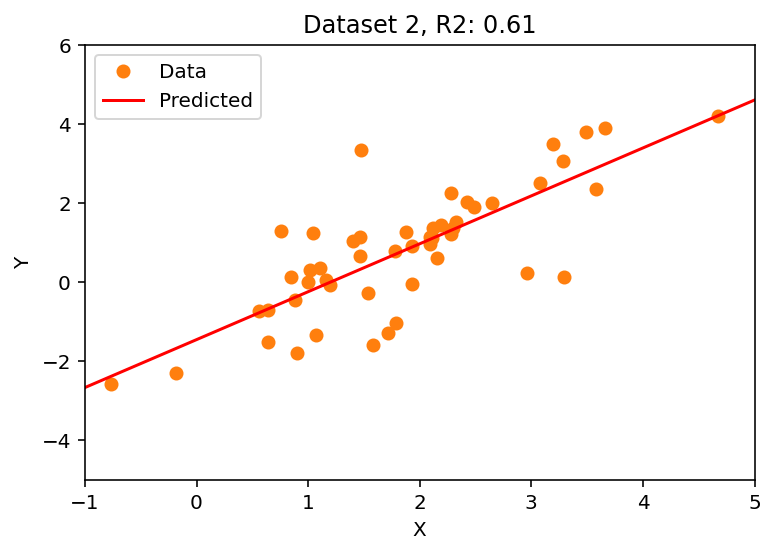

In [ ]:
X_pred = np.linspace(-2,6,num = 100)
reg = linear_reg_dataset2
data = dataset2

plt.plot(data['X'], data['Y'], 'o', label="Data",c = 'C1')
plt.plot(X_pred,reg.predict(exog=dict(X=X_pred)), 'r-', label="Predicted")
plt.title('Dataset 2, '+'R2: '+str(np.round(reg.rsquared,2)))
plt.legend(loc="best")
plt.xlim(-1,5)
plt.ylim(-5,6)
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
print(linear_reg_dataset2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     76.48
Date:                Tue, 23 Feb 2021   Prob (F-statistic):           1.69e-11
Time:                        22:47:42   Log-Likelihood:                -70.294
No. Observations:                  50   AIC:                             144.6
Df Residuals:                      48   BIC:                             148.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4599      0.294     -4.974      0.0

## Residual

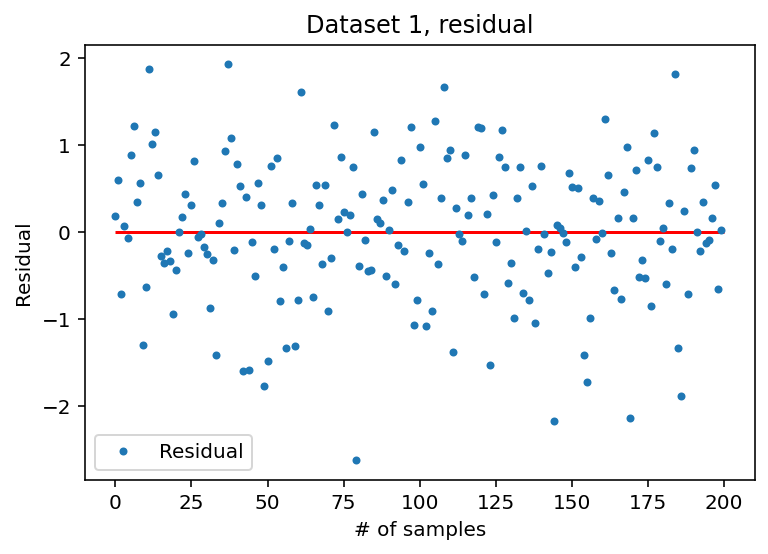

In [ ]:
plt.plot(linear_reg_dataset1.resid,'.', label = 'Residual')
plt.hlines(y = 0, xmin = 0, xmax = 200, color = 'r')
plt.xlabel('# of samples')
plt.ylabel('Residual')
plt.title('Dataset 1, residual')
plt.legend(loc="best")

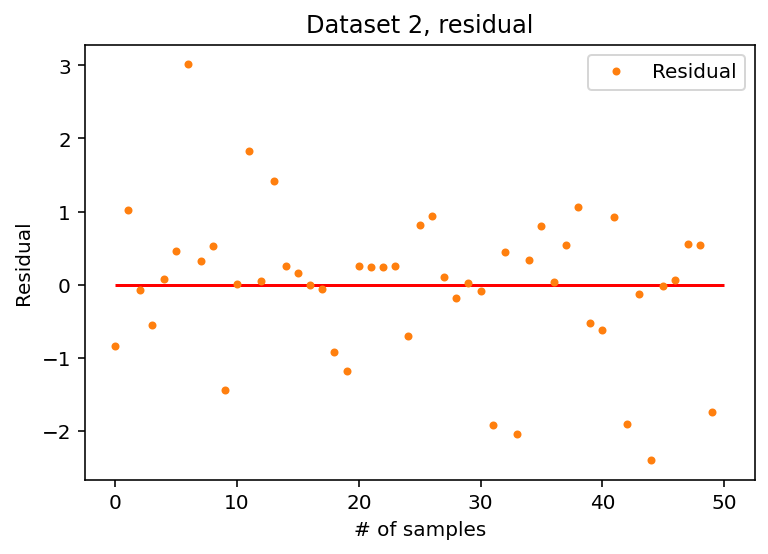

In [ ]:
plt.plot(linear_reg_dataset2.resid,'.', label = 'Residual',c = 'C1')
plt.hlines(y = 0, xmin = 0, xmax = 50, color = 'r')
plt.xlabel('# of samples')
plt.ylabel('Residual')
plt.title('Dataset 2, residual')
plt.legend(loc="best")

## 95% confidence interval

(-5.0, 6.0)

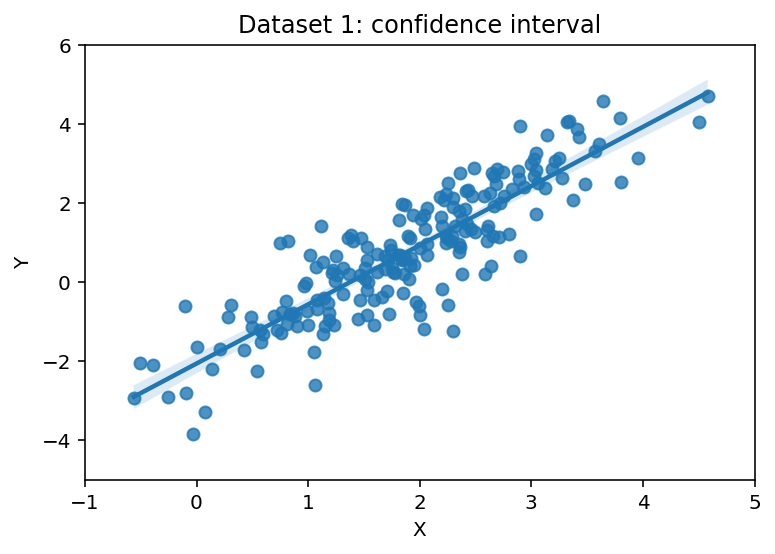

In [ ]:
import seaborn as sns
data = dataset1
sns.regplot(data['X'],data['Y'],color = 'C0')
plt.title('Dataset 1: confidence interval')
plt.xlim(-1,5)
plt.ylim(-5,6)

(-5.0, 6.0)

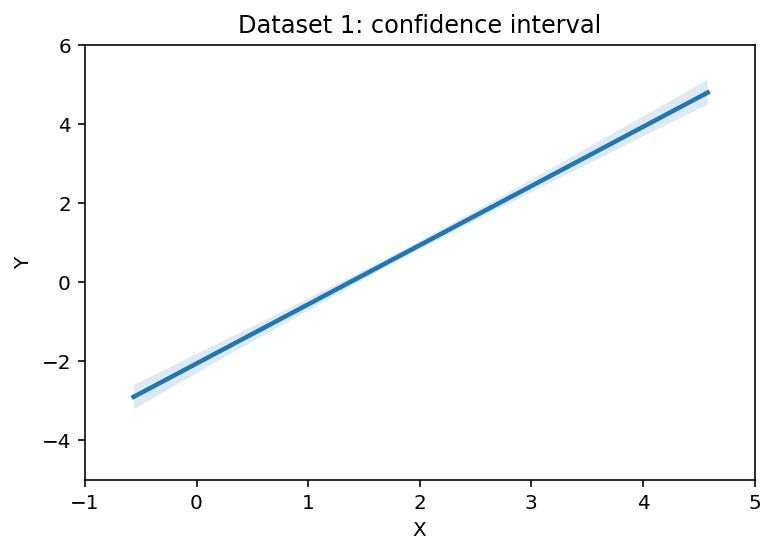

In [ ]:
data = dataset1
sns.regplot(data['X'],data['Y'],color = 'C0',scatter = False)
plt.title('Dataset 1: confidence interval')
plt.xlim(-1,5)
plt.ylim(-5,6)

(-5.0, 6.0)

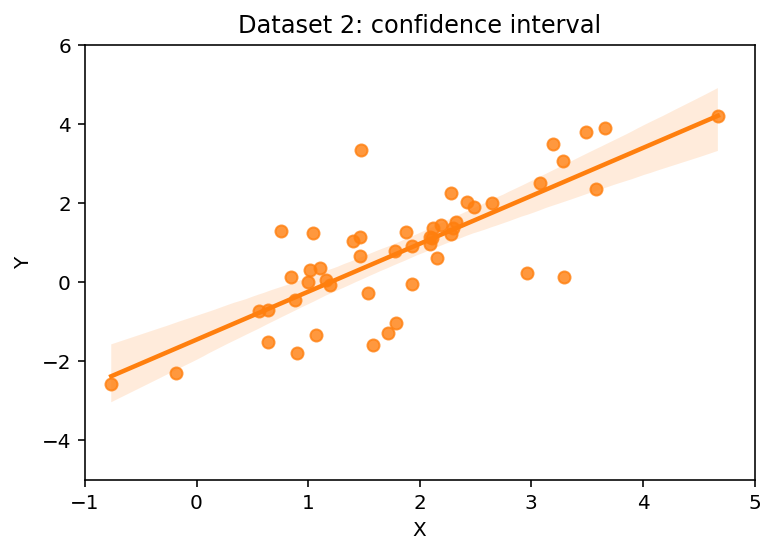

In [ ]:
data = dataset2
sns.regplot(data['X'],data['Y'],color = 'C1')
plt.title('Dataset 2: confidence interval')
plt.xlim(-1,5)
plt.ylim(-5,6)

(-5.0, 6.0)

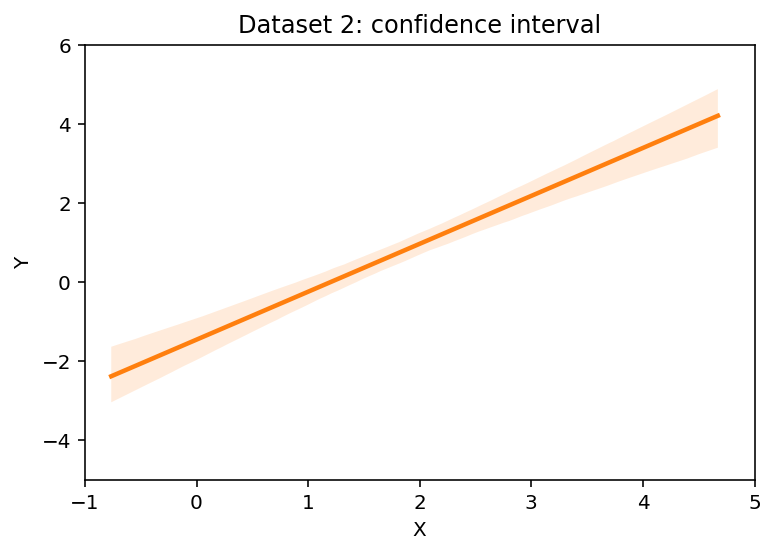

In [ ]:
data = dataset2
sns.regplot(data['X'],data['Y'],color = 'C1',scatter = False)
plt.title('Dataset 2: confidence interval')
plt.xlim(-1,5)
plt.ylim(-5,6)